In [500]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

In [501]:
'''
1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
'''

'\n1: "data (prepare and load)",\n    2: "build model",\n    3: "fitting the model to data (training)",\n    4: "making predictions and evaluating a model (inference)",\n    5: "saving and loading a model",\n    6: "putting it all together"\n'

In [502]:
# Creating *Known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
stop = 1
step = 0.02
X = torch.arange(start, stop , step).unsqueeze(dim = 1)
y = weight * X + bias  # y = b * X + a

X[:10], y[ :10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [503]:
len(X), len(y)

(50, 50)

In [504]:
indices = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).unsqueeze(dim=1)
indices[:8], indices[8:]

(tensor([[1],
         [2],
         [3],
         [4],
         [5],
         [6],
         [7],
         [8]]),
 tensor([[ 9],
         [10]]))

In [505]:
# Creating train / test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [506]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(8, 5))

  # Train data
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')
  # Test data
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Prediction Data')

  plt.legend(prop={'size': 14});

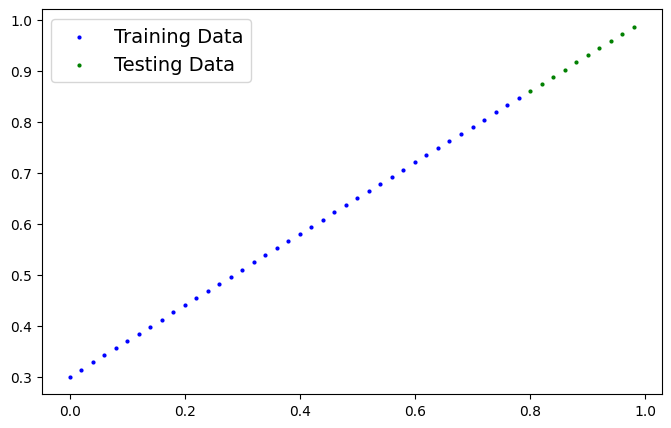

In [507]:
plot_predictions()

# Building a model

In [508]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float),
                                                requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias, will get adjusted as the model learns.
                                            dtype=torch.float),
                                            requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (training/testing features)
        return self.weights * x + self.bias # linear regression formula (y = mx + b)

In [509]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [510]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [511]:
# We use it to make predictions
with torch.inference_mode():
  y_pred = model_0(X_test)

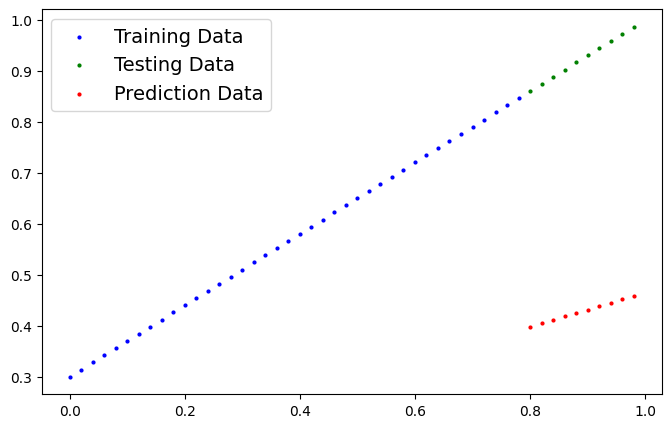

In [512]:
plot_predictions(predictions=y_pred)

The Green dots are the actual y values and the red dots are the predicted y values. Pretty poor performance!!

In [513]:
# Loss fn
loss_fn = nn.L1Loss()
# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) #lr = learning rate (The most important hyperparameter)

In [514]:
# Building a training and testing loop
# An Epoch is one loop through the data
epoch_count = []
loss_values = []
test_loss_values = []

epochs = 170
for epoch in range(epochs):
  # Set the model into training mode (they're in training mode by default)
  model_0.train()
  # Forward pass
  y_pred = model_0(X_train)
  # Calculate loss function
  loss = loss_fn(y_pred, y_train)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Backpropagation
  loss.backward()
  # Performing Gradient Descent (Step optimizer)
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss.item())
      test_loss_values.append(test_loss.item())
      print(f"Epoch = {epochs} | Loss = {loss} | Test Loss = {test_loss} ")
      print(model_0.state_dict())

Epoch = 170 | Loss = 0.31288138031959534 | Test Loss = 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch = 170 | Loss = 0.1976713240146637 | Test Loss = 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch = 170 | Loss = 0.08908725529909134 | Test Loss = 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch = 170 | Loss = 0.053148526698350906 | Test Loss = 0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch = 170 | Loss = 0.04543796554207802 | Test Loss = 0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch = 170 | Loss = 0.04167863354086876 | Test Loss = 0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch = 170 | Loss = 0.03818932920694351 | Test Loss = 0.08886633068323135 
OrderedDict([('weights', tensor

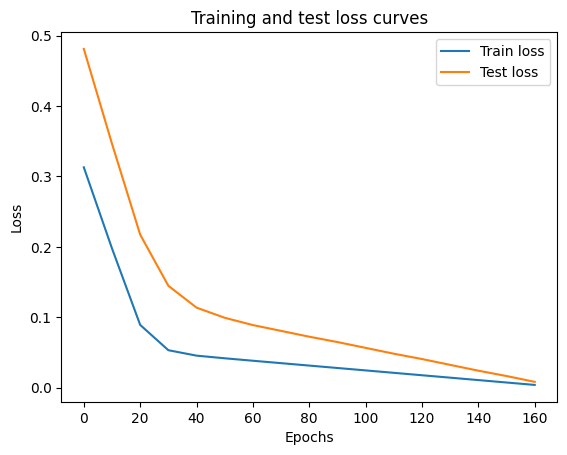

In [515]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [516]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

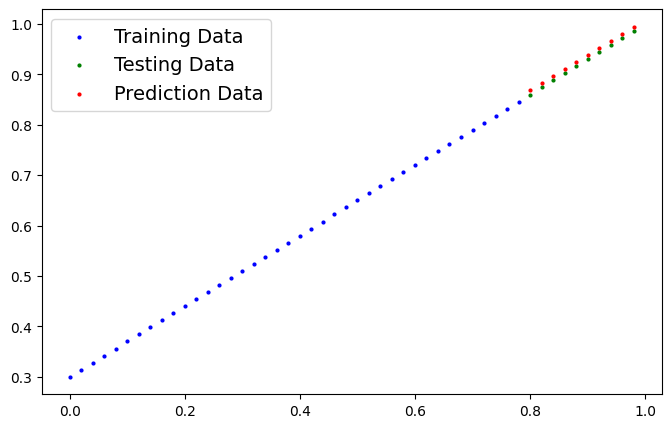

In [517]:
plot_predictions(predictions=y_pred_new);